<a href="https://colab.research.google.com/github/WasiqCh/1-to-10/blob/master/stocks%20forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from google.colab import files
import matplotlib.pyplot as plt

file = files.upload();
# Load the data from the CSV file
df = pd.read_csv('AAPL.csv')

# Get the 'Close' prices from the DataFrame
data = df['Close'].values

# Normalize the data
data = data / np.max(data)

# Define the length of the input sequence
seq_length = 5

# Create the input sequences
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = np.array(X[:split]), np.array(y[:split])
X_test, y_test = np.array(X[split:]), np.array(y[split:])

# Reshape the data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test data
predictions = model.predict(X_test)

# Denormalize the data
predictions = predictions * np.max(data)

# Print the predictions and actual values
for i in range(len(predictions)):
    print('Predicted: ', predictions[i], '\tActual: ', y_test[i])

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
plt.plot(np.max(data) * y_train.reshape(-1,1), label='Actual')
plt.plot(np.max(data) * train_predict, label='Predicted')
plt.plot(np.max(data) * y_test.reshape(-1,1), label='Actual Test')
plt.legend()
plt.show()


In [57]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from google.colab import files
import matplotlib.pyplot as plt

file = files.upload()
# Load the data from the CSV file
df = pd.read_csv('AAPL.csv')

# Get the 'Close' prices from the DataFrame
data = df['Close'].values

# Normalize the data
data = data / np.max(data)

# Define the length of the input sequence
seq_length = 5

# Create the input sequences
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = np.array(X[:split]), np.array(y[:split])
X_test, y_test = np.array(X[split:]), np.array(y[split:])

# Reshape the data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Denormalize the data
print(type(predictions))
predictions = predictions * np.max(data)

# Print the predictions and actual values
for i in range(len(predictions)):
    print('Predicted: ', predictions[i], '\tActual: ', y_test[i])

# Predict the next week's prices
last_prices = data[-seq_length:]
predictions = []
for i in range(7):
    pred = model.predict(last_prices.reshape(1, seq_length, 1))[0][0]
    predictions.append(pred)
    last_prices = np.append(last_prices[1:], pred)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Denormalize the data
predictions = predictions * np.max(data)

# Print the predicted prices for the next week
print('Predictions for the next week: ', predictions)
for pred in predictions:
    print(pred)


Saving AAPL.csv to AAPL (16).csv
Epoch 1/50
32/32 [==============================] - 6s 12ms/step - loss: 0.0861
Epoch 2/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0059
Epoch 3/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 4/50
32/32 [==============================] - 0s 11ms/step - loss: 4.1630e-04
Epoch 5/50
32/32 [==============================] - 0s 11ms/step - loss: 4.0182e-04
Epoch 6/50
32/32 [==============================] - 0s 12ms/step - loss: 3.9294e-04
Epoch 7/50
32/32 [==============================] - 0s 11ms/step - loss: 3.8319e-04
Epoch 8/50
32/32 [==============================] - 0s 11ms/step - loss: 3.7531e-04
Epoch 9/50
32/32 [==============================] - 0s 11ms/step - loss: 3.6856e-04
Epoch 10/50
32/32 [==============================] - 0s 11ms/step - loss: 3.7822e-04
Epoch 11/50
32/32 [==============================] - 0s 12ms/step - loss: 3.8758e-04
Epoch 12/50
32/32 [==============================] - 

Epoch 1/50
32/32 [==============================] - 6s 11ms/step - loss: 0.0767
Epoch 2/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0057
Epoch 3/50
32/32 [==============================] - 0s 12ms/step - loss: 7.6909e-04
Epoch 4/50
32/32 [==============================] - 0s 11ms/step - loss: 3.8667e-04
Epoch 5/50
32/32 [==============================] - 0s 12ms/step - loss: 3.6635e-04
Epoch 6/50
32/32 [==============================] - 0s 12ms/step - loss: 3.7039e-04
Epoch 7/50
32/32 [==============================] - 0s 11ms/step - loss: 3.5350e-04
Epoch 8/50
32/32 [==============================] - 0s 13ms/step - loss: 3.6220e-04
Epoch 9/50
32/32 [==============================] - 0s 11ms/step - loss: 3.5282e-04
Epoch 10/50
32/32 [==============================] - 0s 12ms/step - loss: 3.4765e-04
Epoch 11/50
32/32 [==============================] - 0s 12ms/step - loss: 3.3892e-04
Epoch 12/50
32/32 [==============================] - 0s 10ms/step - loss: 3.4539e-

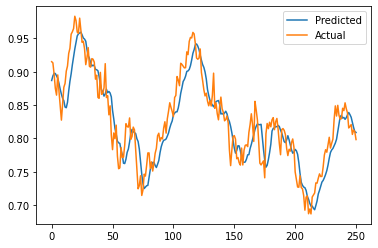

Predicted:  [0.88692534] 	Actual:  0.9151145682960983
Predicted:  [0.8937271] 	Actual:  0.913301470064872
Predicted:  [0.8976022] 	Actual:  0.8964892175289604
Predicted:  [0.89740586] 	Actual:  0.8752266764251051
Predicted:  [0.8939748] 	Actual:  0.865007451925923
Predicted:  [0.89022285] 	Actual:  0.8952804872062108
Predicted:  [0.88261515] 	Actual:  0.8709412029817374
Predicted:  [0.87378746] 	Actual:  0.8501181267545225
Predicted:  [0.86636573] 	Actual:  0.8275369437815763
Predicted:  [0.8603094] 	Actual:  0.8520960401103248
Predicted:  [0.85645604] 	Actual:  0.8768199570578529
Predicted:  [0.84701294] 	Actual:  0.8824789814427498
Predicted:  [0.8461081] 	Actual:  0.900939511591108
Predicted:  [0.85417575] 	Actual:  0.9086314463115062
Predicted:  [0.87121385] 	Actual:  0.9275315182553574
Predicted:  [0.88571167] 	Actual:  0.9351684614902604
Predicted:  [0.8969091] 	Actual:  0.9563760880274734
Predicted:  [0.9105494] 	Actual:  0.9599472875102271
Predicted:  [0.9222685] 	Actual:  0.96

In [59]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from google.colab import files
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('AAPL.csv')

# Get the 'Close' prices from the DataFrame
data = df['Close'].values

# Normalize the data
data = data / np.max(data)

# Define the length of the input sequence
seq_length = 5

# Create the input sequences
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = np.array(X[:split]), np.array(y[:split])
X_test, y_test = np.array(X[split:]), np.array(y[split:])

# Reshape the data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Denormalize the data
predictions = predictions * np.max(data)
y_test = y_test * np.max(data)

# Plot the predicted and actual values
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

# Print the predictions and actual values
for i in range(len(predictions)):
    print('Predicted: ', predictions[i], '\tActual: ', y_test[i])

# Predict the next week's prices
last_prices = data[-seq_length:]
predictions = []
for i in range(7):
    pred = model.predict(last_prices.reshape(1, seq_length, 1))[0][0]
    predictions.append(pred)
    last_prices = np.append(last_prices[1:], pred)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Denormalize the data
predictions = predictions * np.max(data)

# Print the predicted prices for the next week
print('Predictions for the next week: ', predictions)
for pred in predictions:
    print(pred)


Saving AAPL.csv to AAPL (17).csv
Epoch 1/50
32/32 [==============================] - 5s 10ms/step - loss: 0.0756
Epoch 2/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 3/50
32/32 [==============================] - 0s 10ms/step - loss: 8.3160e-04
Epoch 4/50
32/32 [==============================] - 0s 11ms/step - loss: 4.2191e-04
Epoch 5/50
32/32 [==============================] - 0s 10ms/step - loss: 4.0197e-04
Epoch 6/50
32/32 [==============================] - 0s 14ms/step - loss: 4.0489e-04
Epoch 7/50
32/32 [==============================] - 1s 16ms/step - loss: 4.0186e-04
Epoch 8/50
32/32 [==============================] - 0s 15ms/step - loss: 3.7430e-04
Epoch 9/50
32/32 [==============================] - 1s 16ms/step - loss: 3.7387e-04
Epoch 10/50
32/32 [==============================] - 1s 16ms/step - loss: 3.5531e-04
Epoch 11/50
32/32 [==============================] - 1s 17ms/step - loss: 3.4902e-04
Epoch 12/50
32/32 [==============================

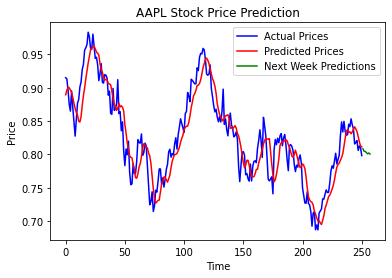

In [60]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from google.colab import files
import matplotlib.pyplot as plt

file = files.upload()
# Load the data from the CSV file
df = pd.read_csv('AAPL.csv')

# Get the 'Close' prices from the DataFrame
data = df['Close'].values

# Normalize the data
data = data / np.max(data)

# Define the length of the input sequence
seq_length = 5

# Create the input sequences
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = np.array(X[:split]), np.array(y[:split])
X_test, y_test = np.array(X[split:]), np.array(y[split:])

# Reshape the data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Denormalize the data
predictions = predictions * np.max(data)
y_test = y_test * np.max(data)

# Print the predictions and actual values
for i in range(len(predictions)):
    print('Predicted: ', predictions[i], '\tActual: ', y_test[i])

# Predict the next week's prices
last_prices = data[-seq_length:]
predictions_next_week = []
for i in range(7):
    pred = model.predict(last_prices.reshape(1, seq_length, 1))[0][0]
    predictions_next_week.append(pred)
    last_prices = np.append(last_prices[1:], pred)

# Denormalize the data
predictions_next_week = np.array(predictions_next_week) * np.max(data)

# Print the predicted prices for the next week
print('Predictions for the next week: ', predictions_next_week)
for pred in predictions_next_week:
    print(pred)

# Plot the predicted and actual prices
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.plot(np.arange(len(y_test), len(y_test)+7), predictions_next_week, color='green', label='Next Week Predictions')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
